In [1]:
from mplsoccer import VerticalPitch, FontManager, Pitch

In [5]:
import ScraperFC as sfc
import pandas as pd
import time
import numpy as np
import requests

In [6]:
def sofascore_tiros(match_id, guardar_csv=False):
        headers = {
                'authority': 'api.sofascore.com',
                'accept': '*/*',
                'accept-language': 'en-US,en;q=0.9',
                'cache-control': 'max-age=0',
                'dnt': '1',
                'if-none-match': 'W/"4bebed6144"',
                'origin': 'https://www.sofascore.com',
                'referer': 'https://www.sofascore.com/',
                'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114"',
                'sec-ch-ua-mobile': '?0',
                'sec-ch-ua-platform': '"macOS"',
                'sec-fetch-dest': 'empty',
                'sec-fetch-mode': 'cors',
                'sec-fetch-site': 'same-site',
                'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        }
        time.sleep(3)
        response = requests.get(f'https://api.sofascore.com/api/v1/event/{match_id}/shotmap', headers=headers)
        tiros = response.json()['shotmap']
        tiros_partido = pd.DataFrame(tiros)

        players = tiros_partido.player.apply(pd.Series)
        coordenadas = tiros_partido.playerCoordinates.apply(pd.Series)

        tiros_partido = pd.concat([tiros_partido.drop(columns=['player']), players], axis=1)
        tiros_partido = pd.concat([tiros_partido.drop(columns=['playerCoordinates']), coordenadas], axis=1)

        return tiros_partido.to_dict("records")

In [79]:
RM_matchesID = [11368722,11905284,11368736,11368762,11368767]

all_shots = []

for match_id in RM_matchesID:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

RM_shots = pd.DataFrame(all_shots)
    

In [80]:
RM_shots['Team'] = np.where(RM_shots['isHome'], 'Real Madrid', 'Opponent')

In [81]:
RM_shots

,isHome,shotType,goalType,situation,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,id,...,shortName,position,jerseyNumber,userCount,fieldTranslations,lastName,x,y,z,Team
0,True,goal,regular,assisted,right-foot,low-right,"{'x': 0, 'y': 46.5, 'z': 14.6}",0.443515,0.8762,1091116,...,A. Güler,M,24,73924,"{'nameTranslation': {'ar': 'غولر، أردا'}, 'sho...",NaN,3.9,62.5,0.0,Real Madrid
1,False,block,NaN,fast-break,right-foot,low-right,"{'x': 0, 'y': 47.8, 'z': 19}",0.091909,NaN,894863,...,A. Douvikas,F,12,1838,{'nameTranslation': {'ar': 'أناستاسيوس دوفيكاس...,NaN,12.1,60.2,0.0,Opponent
2,True,goal,own,regular,left-foot,low-right,"{'x': 0, 'y': 47.2, 'z': 1.3}",NaN,NaN,1069703,...,C. Domínguez,D,28,133,"{'nameTranslation': {'ar': 'كارلوس دومينغيز'},...",,4.3,54.8,0.0,Real Madrid
3,True,miss,NaN,corner,right-foot,right,"{'x': 0, 'y': 30.3, 'z': 12.5}",0.243848,NaN,255239,...,L. Vázquez,D,17,13901,"{'nameTranslation': {'ar': 'فاسكويز, لوكاس'}, ...",,7.4,57.6,0.0,Real Madrid
4,True,save,NaN,assisted,right-foot,low-centre,"{'x': 0, 'y': 48.9, 'z': 4.4}",0.219727,0.2580,69418,...,Joselu,F,14,16198,"{'nameTranslation': {'ar': 'خوسيلو'}, 'shortNa...",NaN,5.1,64.6,0.0,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,True,goal,regular,regular,right-foot,low-centre,"{'x': 0, 'y': 51.4, 'z': 19.6}",0.752036,0.9728,835485,...,B. Díaz,M,21,28431,"{'nameTranslation': {'ar': 'دياز, إبراهيم'}, '...",NaN,3.6,50.5,0.0,Real Madrid
133,False,save,NaN,assisted,right-foot,low-left,"{'x': 0, 'y': 52, 'z': 2.5}",0.241983,0.2013,125407,...,Á. Morata,F,19,18350,"{'nameTranslation': {'ar': 'موراتا, ألفارو'}, ...",NaN,10.7,64.8,0.0,Opponent
134,True,miss,NaN,assisted,right-foot,high,"{'x': 0, 'y': 45.2, 'z': 84.7}",0.044712,NaN,973887,...,E. Camavinga,M,12,46397,{'nameTranslation': {'ar': 'إدواردو كامافينجا'...,,18.4,48.5,0.0,Real Madrid
135,True,save,NaN,assisted,left-foot,low-left,"{'x': 0, 'y': 51.9, 'z': 0.6}",0.049746,0.1281,835485,...,B. Díaz,M,21,28431,"{'nameTranslation': {'ar': 'دياز, إبراهيم'}, '...",NaN,17.8,62.6,0.0,Real Madrid


In [27]:
bcn_matches = (11905292,11368714,11368735,11368755,11369460)


all_shots = []

for match_id in bcn_matches:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

bcn_shots = pd.DataFrame(all_shots)

In [82]:
bcn_shots['Team'] = np.where(bcn_shots['isHome'], 'Barcelona', 'Opponent')

In [29]:
atm_matches = (11368701,11905289,11368733,11368752,12008096)



all_shots = []

for match_id in atm_matches:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

atm_shots = pd.DataFrame(all_shots)

In [83]:
atm_shots['Team'] = np.where(atm_shots['isHome'], 'Atletico Madrid', 'Opponent')

In [30]:
arsenal_matches= (11905295,11352376,11352572,11352493)



all_shots = []

for match_id in arsenal_matches:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

arsenal_shots = pd.DataFrame(all_shots)

In [84]:
arsenal_shots['Team'] = np.where(arsenal_shots['isHome'], 'Arsenal', 'Opponent')

In [31]:
liverpool_matches= (12095439,11352588,12049871,11352512)


all_shots = []

for match_id in liverpool_matches:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

liverpool_shots = pd.DataFrame(all_shots)



In [85]:
liverpool_shots['Team'] = np.where(liverpool_shots['isHome'], 'Liverpool', 'Opponent')

In [32]:
man_city = (12112073,11352548,11905285,11352469,11971437)


all_shots = []

for match_id in man_city:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

man_city_shots = pd.DataFrame(all_shots)




In [86]:
man_city_shots['Team'] = np.where(man_city_shots['isHome'], 'Man City', 'Opponent')

In [33]:
man_utd = (12112071,11352591,11352518,11352398)


all_shots = []

for match_id in man_utd:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

man_utd_shots = pd.DataFrame(all_shots)

In [87]:
man_utd_shots['Team'] = np.where(man_utd_shots['isHome'], 'Man United', 'Opponent')

In [34]:
chelsea = (12112072,11352581,12052670,12003104)


all_shots = []

for match_id in chelsea:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

chelsea_shots = pd.DataFrame(all_shots)



In [88]:
chelsea_shots['Team'] = np.where(chelsea_shots['isHome'], 'Chelsea', 'Opponent')

In [35]:
tottenham = (11352564,11352486,11352439,11352351,11958583)



all_shots = []

for match_id in tottenham:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

tottenham_shots = pd.DataFrame(all_shots)


In [89]:
tottenham_shots['Team'] = np.where(tottenham_shots['isHome'], 'Tottenham', 'Opponent')

In [36]:
inter = (11406815,11406828,11930405,11905259,11406862)



all_shots = []

for match_id in inter:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

inter_shots = pd.DataFrame(all_shots)


In [90]:
inter_shots['Team'] = np.where(inter_shots['isHome'], 'Inter', 'Opponent')

In [37]:
milan = (11406820,12095420,11406849,11905388,11406877)


all_shots = []

for match_id in milan:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

milan_shots = pd.DataFrame(all_shots)


In [91]:
milan_shots['Team'] = np.where(milan_shots['isHome'], 'Milan', 'Opponent')

In [38]:
Juventus = (11406818,11406837,11406846,11406874,11406885)

all_shots = []

for match_id in Juventus:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

juventus_shots = pd.DataFrame(all_shots)

In [92]:
juventus_shots['Team'] = np.where(juventus_shots['isHome'], 'Juventus', 'Opponent')

In [40]:
bayern = (11396262,11905286,11396282,11396308)


all_shots = []

for match_id in bayern:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

bayern_shots = pd.DataFrame(all_shots)

In [93]:
bayern_shots['Team'] = np.where(bayern_shots['isHome'], 'Bayern', 'Opponent')

In [41]:
dortmund = (11396256,11905287,11396280,11396300,11396316)


all_shots = []

for match_id in dortmund:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

dortmund_shots = pd.DataFrame(all_shots)

In [94]:
dortmund_shots['Team'] = np.where(dortmund_shots['isHome'], 'Dortmund', 'Opponent')

In [42]:
psg = (12055068,11391356,11391362,11905258,11391370)


all_shots = []

for match_id in psg:
    # Retrieve shot data for the current match ID
    match_shot_data = sofascore_tiros(match_id)

    all_shots.extend(match_shot_data)

psg_shots = pd.DataFrame(all_shots)




In [95]:
psg_shots['Team'] = np.where(psg_shots['isHome'], 'PSG', 'Opponent')

In [96]:
total_shots = pd.concat([RM_shots, bcn_shots,atm_shots,man_city_shots,man_utd_shots,arsenal_shots,liverpool_shots,chelsea_shots,tottenham_shots,inter_shots, milan_shots,juventus_shots,bayern_shots,dortmund_shots,psg_shots], axis=0)

In [97]:
total_shots

,isHome,shotType,goalType,situation,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,id,...,position,jerseyNumber,userCount,fieldTranslations,lastName,x,y,z,Team,shootoutOrder
0,True,goal,regular,assisted,right-foot,low-right,"{'x': 0, 'y': 46.5, 'z': 14.6}",0.443515,0.8762,1091116,...,M,24,73924,"{'nameTranslation': {'ar': 'غولر، أردا'}, 'sho...",NaN,3.9,62.5,0.0,Real Madrid,NaN
1,False,block,NaN,fast-break,right-foot,low-right,"{'x': 0, 'y': 47.8, 'z': 19}",0.091909,NaN,894863,...,F,12,1838,{'nameTranslation': {'ar': 'أناستاسيوس دوفيكاس...,NaN,12.1,60.2,0.0,Opponent,NaN
2,True,goal,own,regular,left-foot,low-right,"{'x': 0, 'y': 47.2, 'z': 1.3}",NaN,NaN,1069703,...,D,28,133,"{'nameTranslation': {'ar': 'كارلوس دومينغيز'},...",,4.3,54.8,0.0,Real Madrid,NaN
3,True,miss,NaN,corner,right-foot,right,"{'x': 0, 'y': 30.3, 'z': 12.5}",0.243848,NaN,255239,...,D,17,13901,"{'nameTranslation': {'ar': 'فاسكويز, لوكاس'}, ...",,7.4,57.6,0.0,Real Madrid,NaN
4,True,save,NaN,assisted,right-foot,low-centre,"{'x': 0, 'y': 48.9, 'z': 4.4}",0.219727,0.2580,69418,...,F,14,16198,"{'nameTranslation': {'ar': 'خوسيلو'}, 'shortNa...",NaN,5.1,64.6,0.0,Real Madrid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,True,goal,own,regular,left-foot,low-left,"{'x': 0, 'y': 53.1, 'z': 7.6}",NaN,NaN,1049775,...,D,4,415,{'nameTranslation': {'ar': 'ريبيرو ، أليكساندر...,,9.7,54.6,0.0,PSG,NaN
125,True,miss,NaN,assisted,left-foot,right,"{'x': 0, 'y': 3.5, 'z': 15.3}",0.042149,NaN,934510,...,F,9,15063,"{'nameTranslation': {'ar': 'جونتشالو راموس'}, ...",,8.2,27.9,0.0,PSG,NaN
126,True,save,NaN,assisted,left-foot,low-centre,"{'x': 0, 'y': 51.6, 'z': 19.6}",0.018775,0.0706,818244,...,F,10,79790,"{'nameTranslation': {'ar': 'ديمبيلي, عثمان'}, ...",,26.6,63.4,0.0,PSG,NaN
127,True,goal,regular,assisted,right-foot,low-left,"{'x': 0, 'y': 52.8, 'z': 13.3}",0.771537,0.4872,934510,...,F,9,15063,"{'nameTranslation': {'ar': 'جونتشالو راموس'}, ...",,11.1,46.4,0.0,PSG,NaN


In [118]:
df_shots= total_shots[['shotType', 'situation', 'bodyPart','x', 'y','Team']]

In [119]:
df_shots['is_goal'] = df_shots['shotType'].apply(lambda x: 1 if x == 'goal' else 0)

C:\Users\pablo\AppData\Local\Temp\ipykernel_6640\2367152611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shots['is_goal'] = df_shots['shotType'].apply(lambda x: 1 if x == 'goal' else 0)


In [120]:
df_shots['Distance'] = np.sqrt(np.square(0-df_shots['x']) + np.square(50 - df_shots['y']))

C:\Users\pablo\AppData\Local\Temp\ipykernel_6640\1746596841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shots['Distance'] = np.sqrt(np.square(0-df_shots['x']) + np.square(50 - df_shots['y']))


In [113]:
#df_shots['angle'] = np.arctan(7.32 *df_shots['x'] /(df_shots['x']**2 + df_shots['y']**2 - (7.32/2)**2))

In [121]:
df_shots_team = df_shots[['bodyPart', 'x','y','is_goal','Distance','Team']]

In [122]:
df_shots_X = df_shots[['bodyPart', 'x','y','is_goal','Distance']]

In [123]:
df_shots_X

,bodyPart,x,y,is_goal,Distance
0,right-foot,3.9,62.5,1,13.094274
1,right-foot,12.1,60.2,0,15.825612
2,left-foot,4.3,54.8,1,6.444377
3,right-foot,7.4,57.6,0,10.607544
4,right-foot,5.1,64.6,0,15.465122
...,...,...,...,...,...
124,left-foot,9.7,54.6,1,10.735455
125,left-foot,8.2,27.9,0,23.572229
126,left-foot,26.6,63.4,0,29.784560
127,right-foot,11.1,46.4,1,11.669190


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame with columns ['bodyPart', 'x', 'y', 'is_goal', 'Distance']

# One-hot encode the 'bodyPart' column
df_shots_encoded = pd.get_dummies(df_shots_X, columns=['bodyPart'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = df_shots_encoded.drop(columns=['is_goal'])
y = df_shots_encoded['is_goal']

# Standardize the features
ct = ColumnTransformer([('standard_scaler', StandardScaler(), ['x', 'y', 'Distance'])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.884469696969697
Testing Accuracy: 0.8914141414141414


C:\Users\pablo\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\pablo\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pablo\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\pablo\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [125]:
import pandas as pd

# Assuming X is a numpy ndarray
probabilities = model.predict_proba(X)[:, 1]
probabilities_df = pd.DataFrame(probabilities, columns=['xG'])

# Convert X to a DataFrame
X_df = pd.DataFrame(X)

# Concatenate X_df and probabilities_df
df_shots_prob = pd.concat([df_shots_team.reset_index(drop=True), probabilities_df], axis=1)

df_shots_prob


,bodyPart,x,y,is_goal,Distance,Team,xG
0,right-foot,3.9,62.5,1,13.094274,Real Madrid,0.247957
1,right-foot,12.1,60.2,0,15.825612,Opponent,0.158998
2,left-foot,4.3,54.8,1,6.444377,Real Madrid,0.434589
3,right-foot,7.4,57.6,0,10.607544,Real Madrid,0.306006
4,right-foot,5.1,64.6,0,15.465122,Real Madrid,0.186331
...,...,...,...,...,...,...,...
1975,left-foot,9.7,54.6,1,10.735455,PSG,0.269401
1976,left-foot,8.2,27.9,0,23.572229,PSG,0.044555
1977,left-foot,26.6,63.4,0,29.784560,PSG,0.016479
1978,right-foot,11.1,46.4,1,11.669190,PSG,0.249127


In [140]:
df_shots_prob[['bodyPart', 'x', 'y', 'Distance', 'is_goal', 'xG','Team']]

,bodyPart,x,y,Distance,is_goal,xG,Team
0,right-foot,3.9,62.5,13.094274,1,0.247957,Real Madrid
1,right-foot,12.1,60.2,15.825612,0,0.158998,Opponent
2,left-foot,4.3,54.8,6.444377,1,0.434589,Real Madrid
3,right-foot,7.4,57.6,10.607544,0,0.306006,Real Madrid
4,right-foot,5.1,64.6,15.465122,0,0.186331,Real Madrid
...,...,...,...,...,...,...,...
1975,left-foot,9.7,54.6,10.735455,1,0.269401,PSG
1976,left-foot,8.2,27.9,23.572229,0,0.044555,PSG
1977,left-foot,26.6,63.4,29.784560,0,0.016479,PSG
1978,right-foot,11.1,46.4,11.669190,1,0.249127,PSG


In [ ]:
teams_shots = [RM_shots, bcn_shots,atm_shots,man_city_shots,man_utd_shots,arsenal_shots,liverpool_shots,chelsea_shots,tottenham_shots,inter_shots, milan_shots,juventus_shots,bayern_shots,dortmund_shots,psg_shots]


In [135]:
bcn_shots_prob = df_shots_prob[df_shots_prob['Team'] == 'Barcelona']

In [136]:
bcn_shots_prob.is_goal.sum(),bcn_shots_prob.xG.sum()

(12, 11.204296274653407)

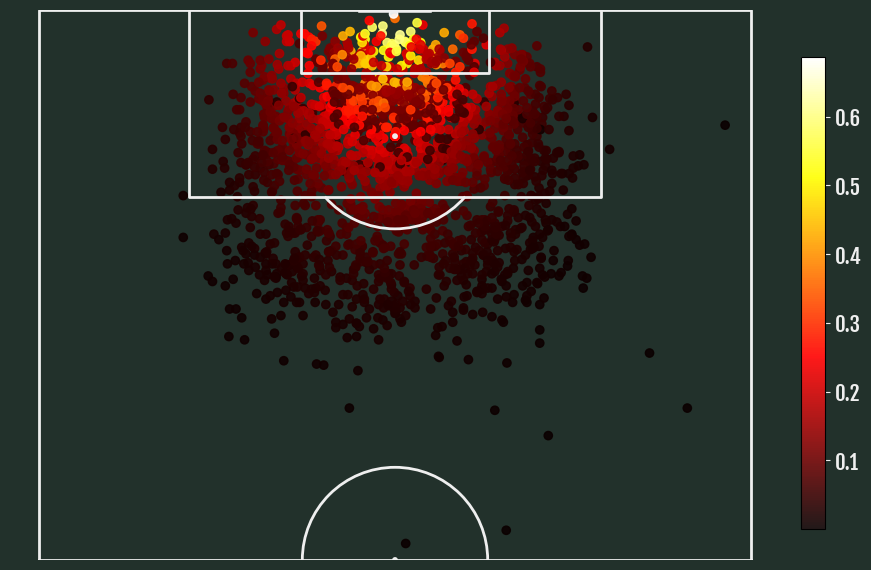

In [141]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer import FontManager

URL_font= 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular= FontManager(URL_font)

# Define the pitch
pitch = VerticalPitch(pitch_type='opta', line_zorder=2,
                     pitch_color= '#22312b', line_color = '#efefef',)

# Create a figure and axis
fig, ax = pitch.draw(figsize=(8, 6))
fig.set_facecolor('#22312b')

pcm= pitch.scatter(df_shots_prob.x, df_shots_prob.y , c=df_shots_prob['xG'],ax=ax, alpha=.9, cmap='hot')
ax_cbar = fig.add_axes((1.008,0.093,0.03,0.786))
cbar = plt.colorbar(pcm, cmap='hot', cax= ax_cbar)
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)


ax.set_ylim(50, 0)

plt.show()


In [124]:
pitch.dim.goal_top

54.8